# Create the markdown table content

| **Variable**                     | **Description**                                                                                          |
|-----------------------------------|----------------------------------------------------------------------------------------------------------|
| `id`                              | A unique identifier for each loan application or applicant.                                                |
| `person_age`                      | The age of the loan applicant.                                                                             |
| `person_income`                   | The income of the loan applicant.                                                                          |
| `person_home_ownership`           | The home ownership status of the applicant (e.g., Rent, Own, Mortgage, etc.).                              |
| `person_emp_length`               | The length of the applicant's employment (in years).                                                       |
| `loan_intent`                     | The purpose of the loan (e.g., personal, education, medical, debt consolidation, etc.).                    |
| `loan_grade`                      | A grading assigned to the loan based on risk (e.g., A, B, C, etc.).                                        |
| `loan_amnt`                       | The amount of the loan requested by the applicant.                                                         |
| `loan_int_rate`                   | The interest rate charged on the loan.                                                                     |
| `loan_percent_income`             | The ratio of the loan amount to the applicant's income.                                                    |
| `cb_person_default_on_file`       | Indicates whether the applicant has defaulted on a loan before (Y for yes, N for no).                      |
| `cb_person_cred_hist_length`      | The length of the applicant's credit history (in years).                                                   |
| `loan_status`                     | The target variable, indicating whether the loan was approved (1) or denied (0).                           |


# <span Style='Color:orange'> I. Exploratory Data Analysis

## <span Style='Color:red'> 1. Data loading and Preview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)
from sklearn import metrics, preprocessing, model_selection, ensemble
import xgboost
from xgboost import plot_importance
import optuna
import pickle
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [2]:
# Read the dataset
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df= pd.concat([df_train, df_test])

In [3]:
# Check the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
# See the statisctics of the data
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
# Check for missing data
df_train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
# Check for duplicated rows
df_train.duplicated().sum()

0

## <span Style='Color:red'> 2. Univariate Analysis

### <span Style='Color:darkblue'> a. Numeric Distribution

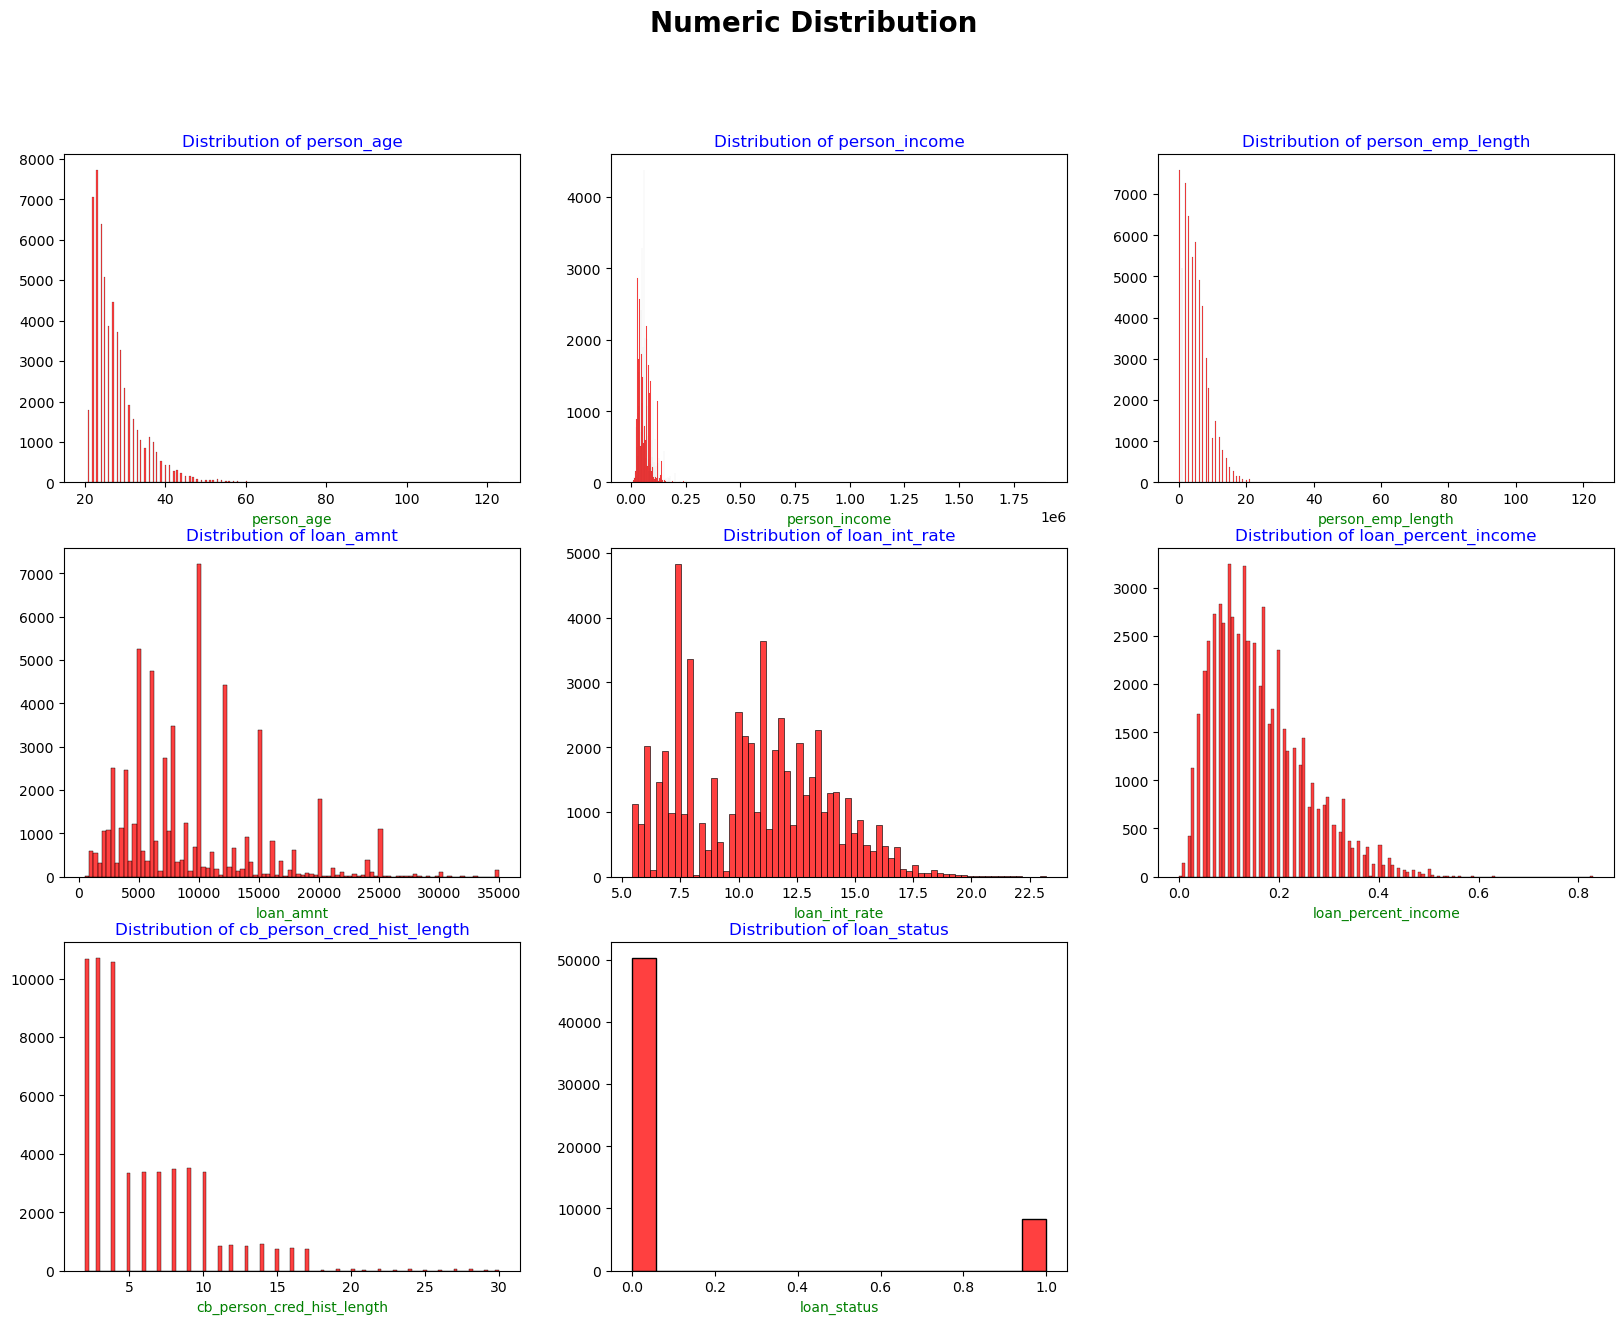

In [7]:
def visualize_numeric_variable(df_train):
    numeric_columns= df_train.select_dtypes(include='number').columns.drop('id')

    fig, axes= plt.subplots(3,3, figsize=(20, 14.5))
    axes= axes.flatten()
    fig.suptitle('Numeric Distribution', size= 20, fontweight='bold')

    for i, col in enumerate(numeric_columns):
        sns.histplot(x= df_train[col], ax= axes[i], color='red')
        axes[i].set_xlabel(f'{col}', color='green')
        axes[i].set_ylabel('')
        axes[i].set_title(f'Distribution of {col}', color='blue')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

visualize_numeric_variable(df_train)

### <span Style='Color:darkblue'> 2. Categorical Distribution

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3112\3951153663.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3112\3951153663.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3112\3951153663.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3112\3951153663.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



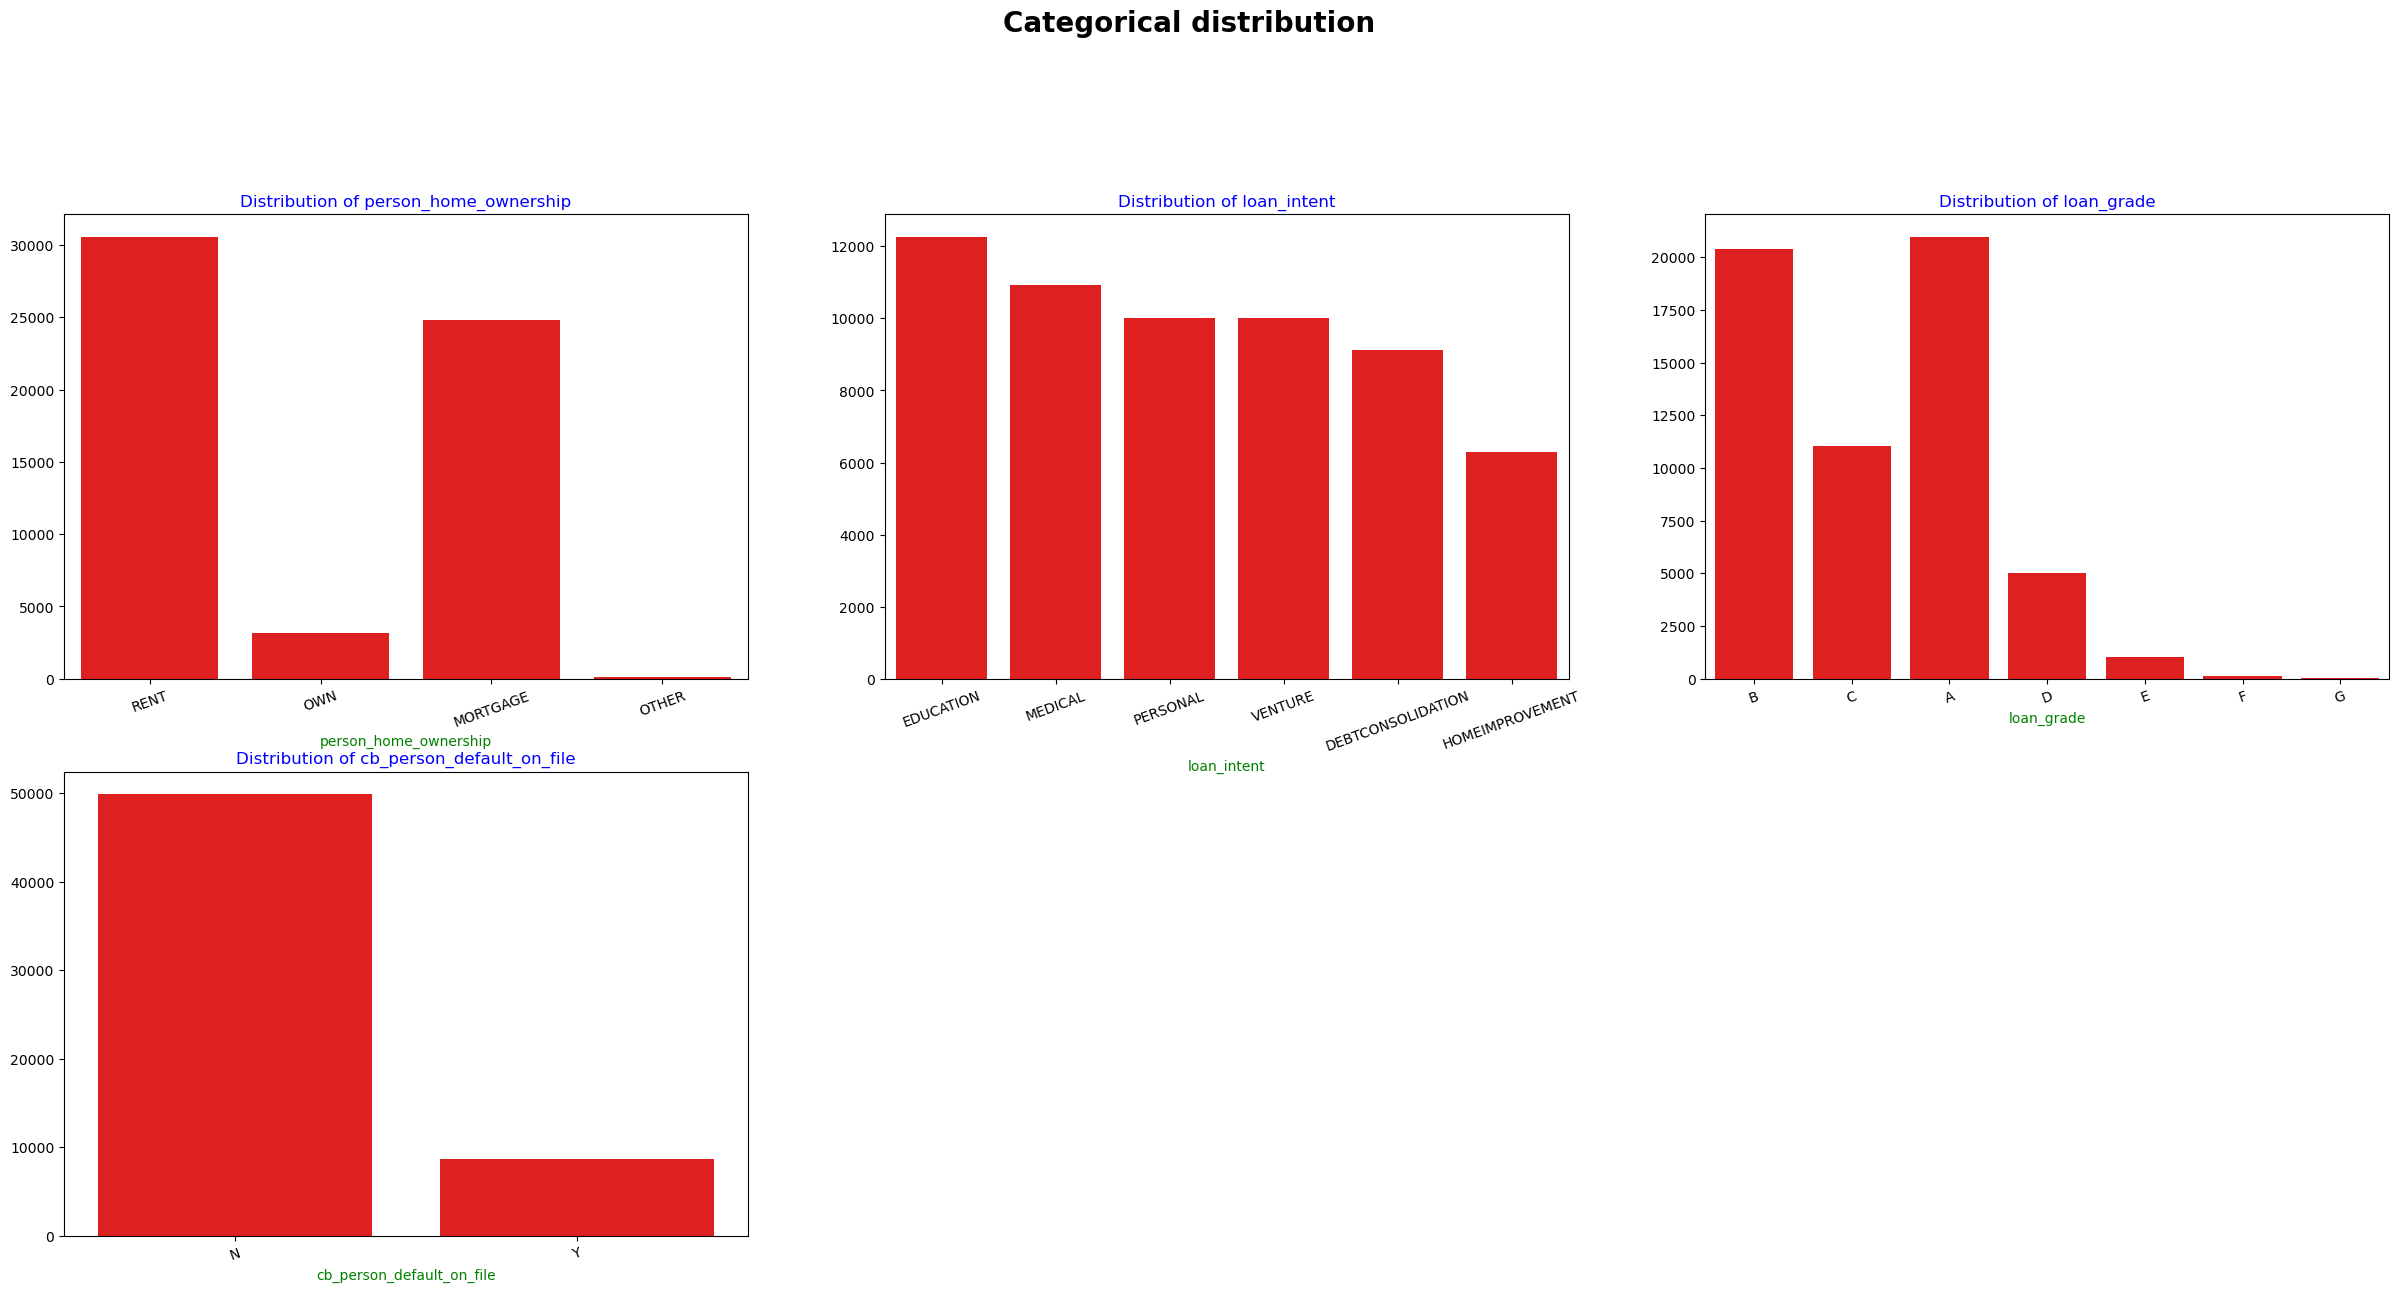

In [8]:
def visualize_categorical_variable(df_train):
    categorical_columns= df_train.select_dtypes(exclude='number')

    fig, axes= plt.subplots(3,3, figsize=(30, 20.5))
    axes= axes.flatten()
    fig.suptitle('Categorical distribution', size= 20, fontweight='bold')

    for i, col in enumerate(categorical_columns):
        sns.countplot(x= df_train[col], ax= axes[i], color='red')
        axes[i].set_xlabel(f'{col}', color='green')
        axes[i].set_ylabel('')
        axes[i].set_title(f'Distribution of {col}', color='blue')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)  # Rotate the x-tick labels by 30 degrees
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

visualize_categorical_variable(df_train)

## <span Style='Color:red'> 3. Bivariate Analysis

### <span Style='Color:darkblue'> a. Numeric analysis

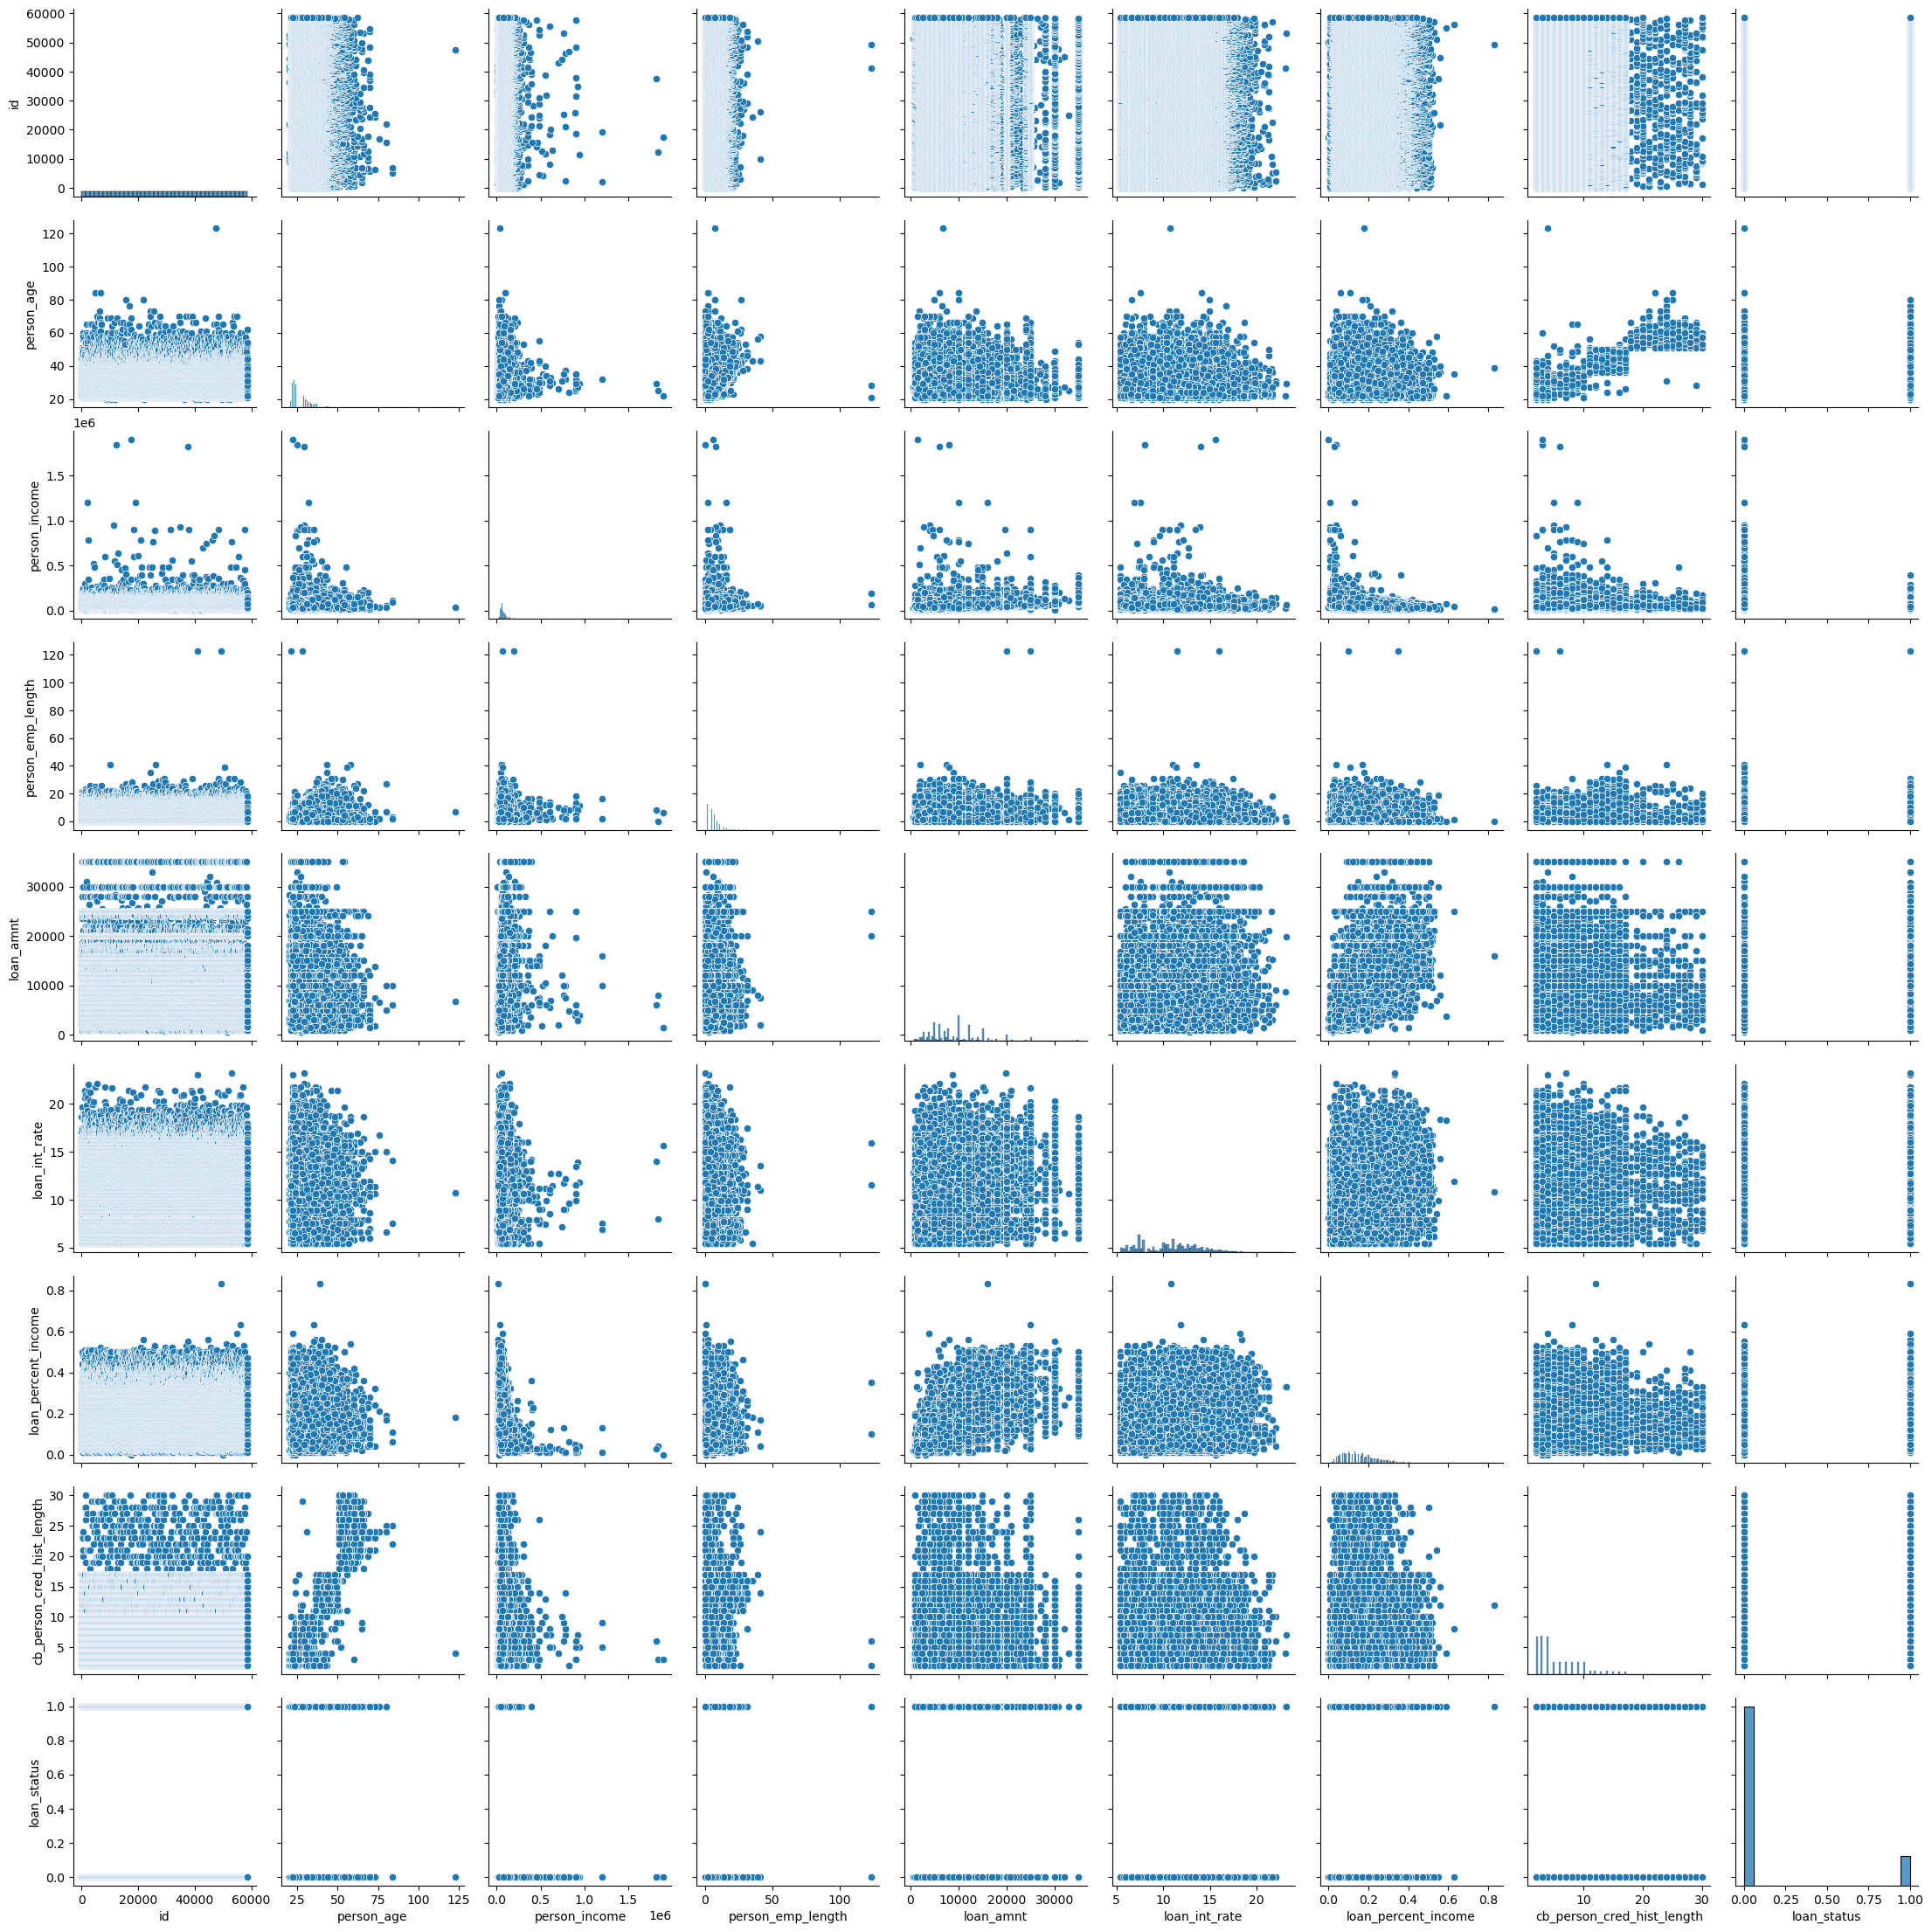

In [9]:
# See the Bivariate Analysis
sns.pairplot(df_train)

### <span Style='Color:darkblue'> b. Categorical analysis

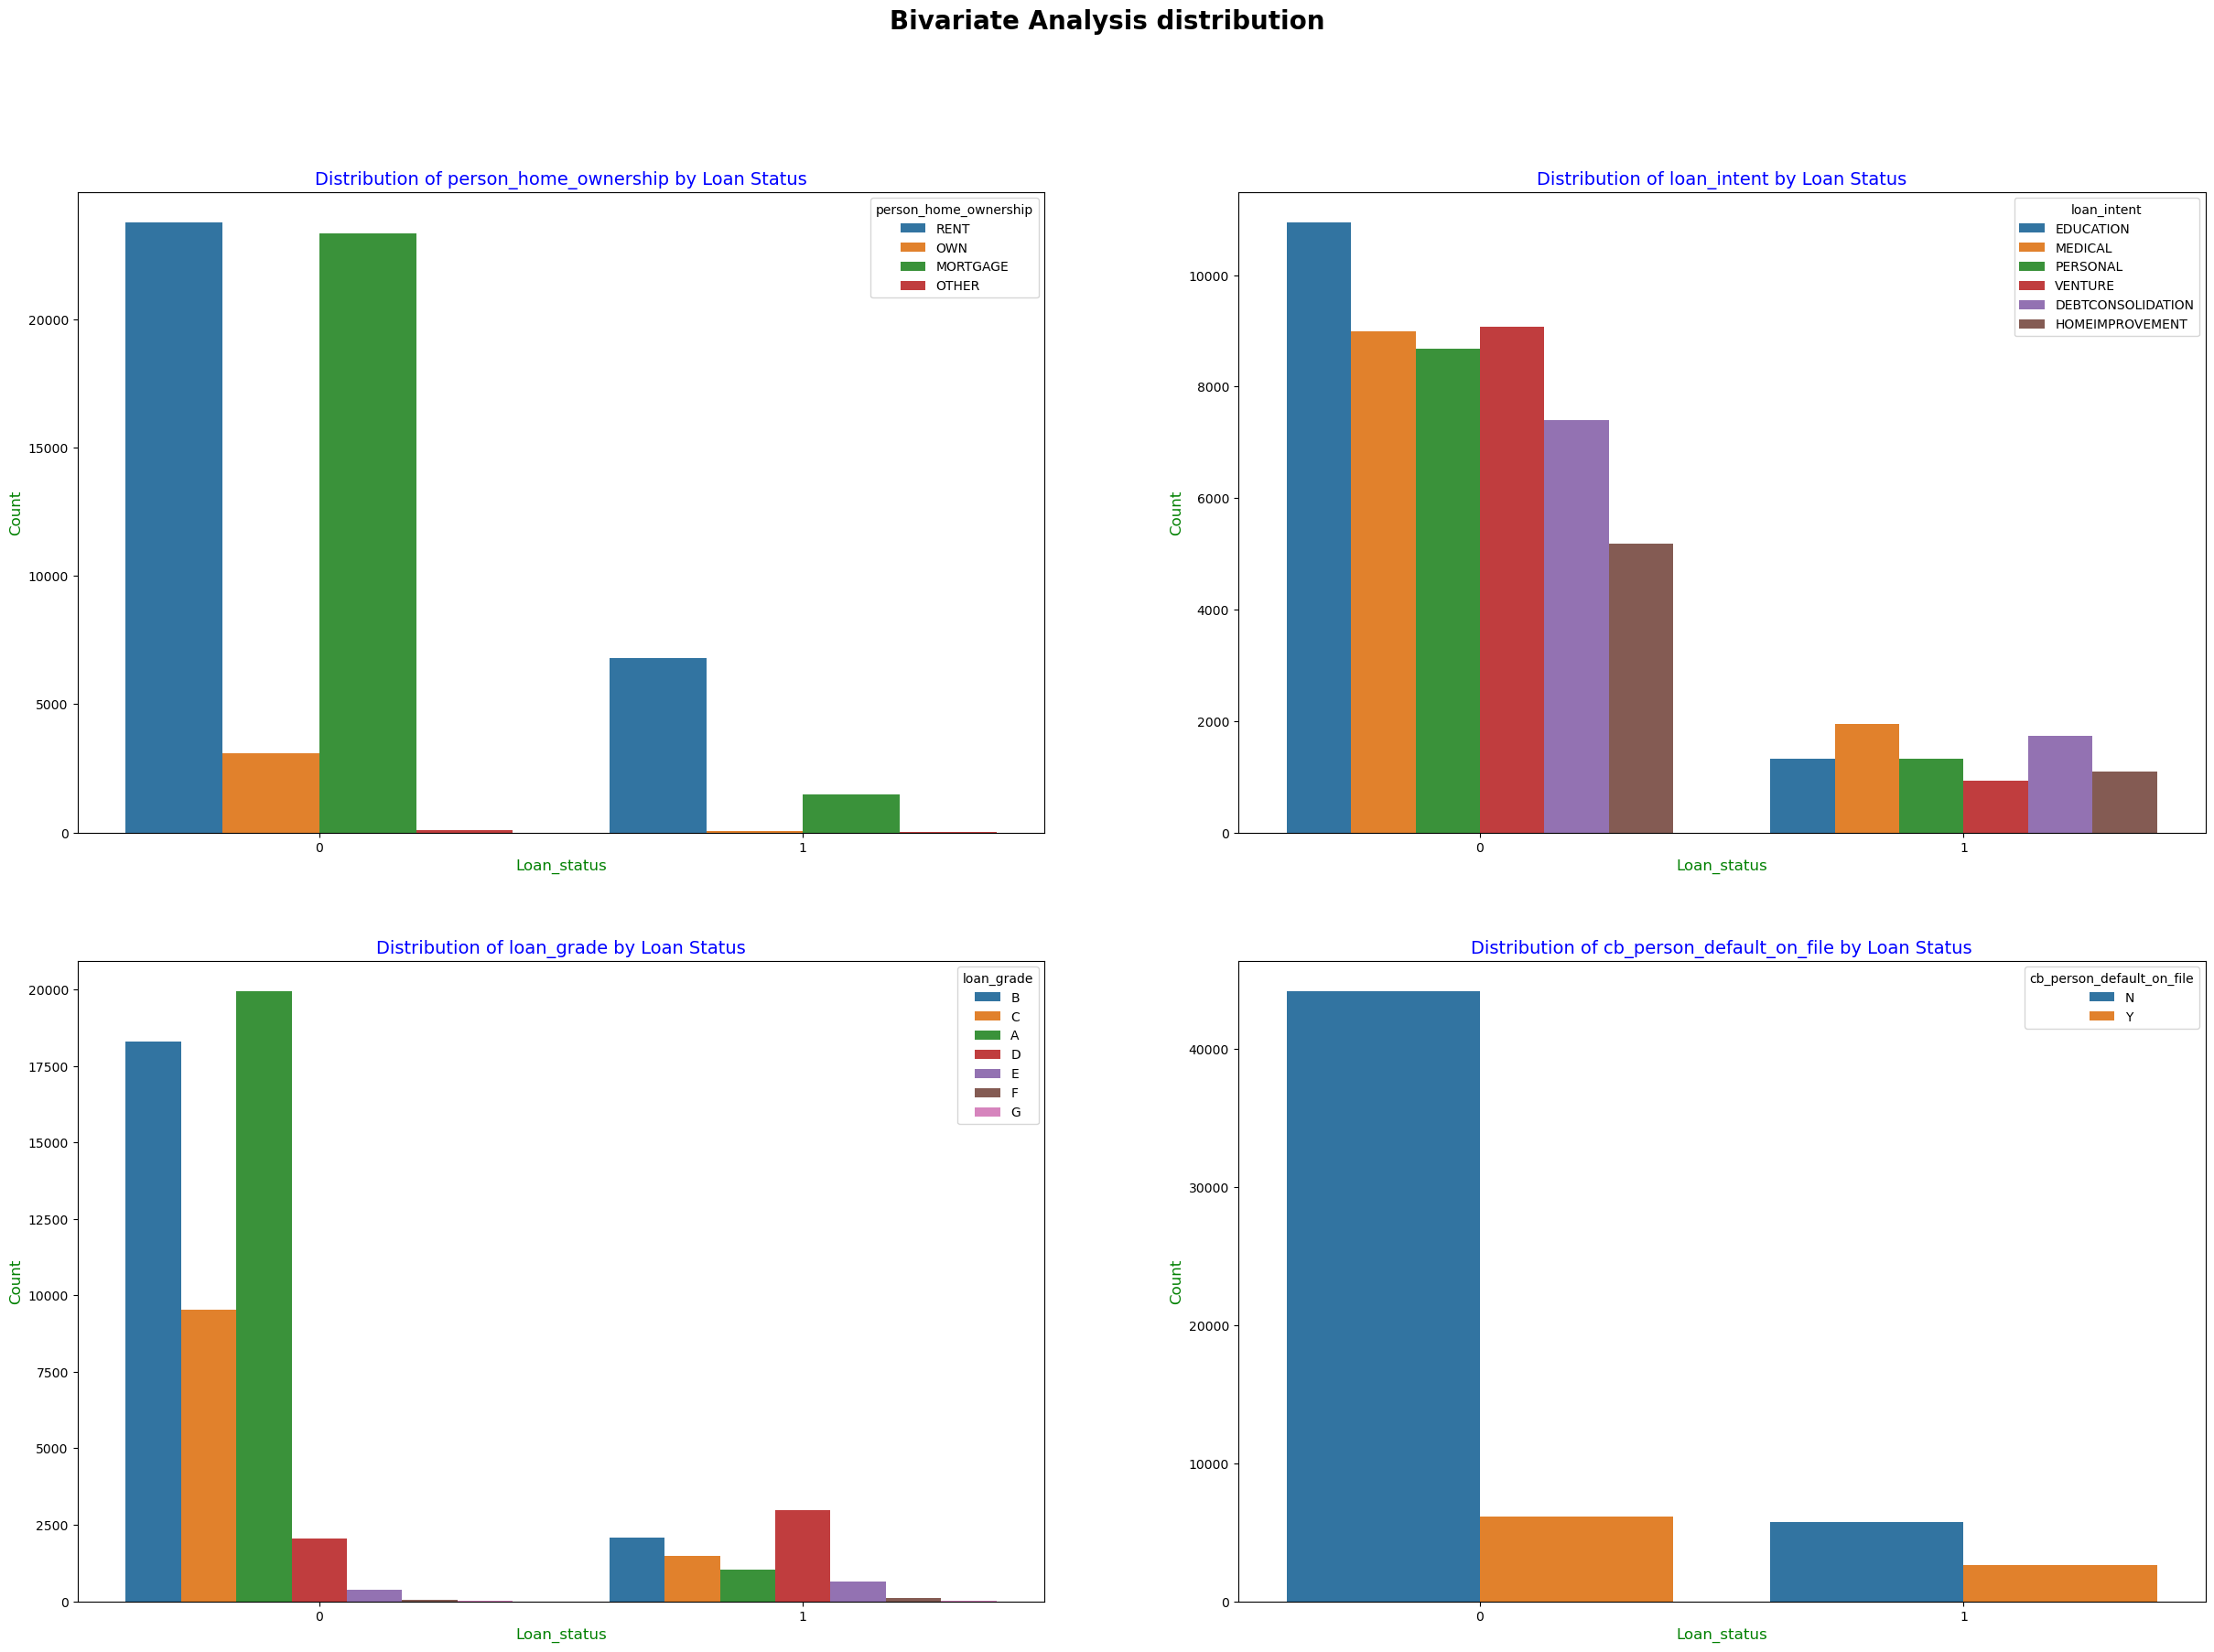

In [10]:
def bivariate_categorical_distribution(df_train):
    categ_columns= df_train.select_dtypes(exclude='number').columns
    
    fig, axes= plt.subplots(2,2, figsize=(30,20))
    fig.suptitle('Bivariate Analysis distribution', size= 20, fontweight='bold')
    axes= axes.flatten()
    
    # Plot the histplot of categorical 
    for i, col in enumerate(categ_columns):
        sns.countplot(x= df_train['loan_status'], hue=df_train[col], ax=axes[i])
        axes[i].set_xlabel(f'Loan_status', size= 12, color='green')
        axes[i].set_ylabel('Count', size=12, color='green')
        axes[i].set_title(f'Distribution of {col} by Loan Status', size= 14, color='blue')

bivariate_categorical_distribution(df_train)

# <span Style='Color:orange'> II. Model Building

## <span Style='Color:red'> 1. Previewing data

In [11]:
# Drop the uncessary columns
train_data= df_train.drop('id', axis=1).reset_index(drop=True)

In [12]:
# Encode the Variables 
encoder_intent= preprocessing.OneHotEncoder()
encoded_intent= encoder_intent.fit_transform(np.asanyarray(train_data['loan_intent']).reshape(-1,1)).toarray()
model_intent_df= pd.DataFrame(encoded_intent, columns= encoder_intent.get_feature_names_out(['loan_intent']))
train_data= pd.concat([train_data, model_intent_df],axis=1)


encoder_grade= preprocessing.OneHotEncoder()
encoded_grade= encoder_grade.fit_transform(np.asanyarray(train_data['loan_grade']).reshape(-1,1)).toarray()
model_grade_df= pd.DataFrame(encoded_grade, columns= encoder_grade.get_feature_names_out(['loan_grade']))
train_data= pd.concat([train_data, model_grade_df],axis=1)

encoder_ownership= preprocessing.OneHotEncoder()
encoded_ownership= encoder_ownership.fit_transform(np.asanyarray(train_data['person_home_ownership']).reshape(-1,1)).toarray()
model_owner_df= pd.DataFrame(encoded_ownership, columns= encoder_ownership.get_feature_names_out(['person_home_ownership']))
train_data= pd.concat([train_data, model_owner_df],axis=1)

encoder_default= preprocessing.OneHotEncoder()
encoded_default= encoder_default.fit_transform(np.asanyarray(train_data['cb_person_default_on_file']).reshape(-1,1)).toarray()
model_default_df= pd.DataFrame(encoded_default, columns= encoder_default.get_feature_names_out(['cb_person_default_on_file']))
train_data= pd.concat([train_data, model_default_df], axis=1)

# Drop the reduntdant columns
train_data.drop(['loan_intent','loan_grade','person_home_ownership', 'cb_person_default_on_file'], axis=1, inplace= True)

In [78]:
# Split the data
X= train_data.copy()
X= train_data.drop('loan_status', axis=1)

y= train_data['loan_status']

X_train, X_val, y_train, y_val = model_selection.train_test_split(X,y ,test_size=.20, stratify=y, random_state=42) 

In [14]:
# Define a function to get the accuracy and other metrics including ROC AUC
def get_accuracy(model_name, model, X, y):
    # Predict class labels
    y_pred = model.predict(X)
    
    # Predict probabilities for the positive class (for ROC AUC)
    y_proba = model.predict_proba(X)[:, 1]
    
    # Calculate metrics
    F1 = round(metrics.f1_score(y, y_pred), 3)
    Precision = round(metrics.precision_score(y, y_pred), 3)
    Recall = round(metrics.recall_score(y, y_pred), 3)
    Accuracy = round(metrics.accuracy_score(y, y_pred), 3)
    ROC_AUC = round(metrics.roc_auc_score(y, y_proba), 3)
    
    # Return metrics in a DataFrame
    return pd.DataFrame({'Model': [model_name],
                         'F1 Score': [F1],
                         'Precision': [Precision],
                         'Recall': [Recall],
                         'Accuracy': [Accuracy],
                         'ROC AUC': [ROC_AUC]})


In [15]:
# Define a funciton to see the matrix
def see_confusion_matrix(model, X, y):
    y_pred= model.predict(X)
    cm= metrics.confusion_matrix(y, y_pred)
    cmap= sns.color_palette("Blues", as_cmap=True)
    disp= metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap)

 ## <span Style='Color:red'> 2. XGBoost model with Optuna 

In [16]:

# Define the objective function
def objective(trial):
    param= {'n_estimators':trial.suggest_int('n_estimators', 50 ,200),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 50),
            'max_depth': trial.suggest_int('max_depth', 20, 100),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'subsample':trial.suggest_float('subsample', 0.5, 1)}
    model= xgboost.XGBClassifier(**param)
    score= model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_score= score.mean()
    return mean_score

In [17]:
# Define the study_xgb function 
#study_xgb= optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
#study_xgb.optimize(objective,n_trials=100)

In [18]:
# Save the study into a pickle
#with open('study_xgb.pickle', 'wb')as to_write:
    #pickle.dump(study_xgb, to_write)


In [19]:
# Load the study
with open('study_xgb.pickle', 'rb') as to_read:
    study_xgb= pickle.load(to_read)

In [20]:
# Plot out the history of trials
optuna.visualization.plot_optimization_history(study_xgb)

In [21]:
# See the most important hyperparameters
optuna.visualization.plot_param_importances(study_xgb)

In [22]:
# See the contribution of each hypterparmeters throughout tests
optuna.visualization.plot_slice(study_xgb)

In [23]:
# Set up the model with the best parameters
best_xgb_param= study_xgb.best_params
xgb_op = xgboost.XGBClassifier(**best_xgb_param)
xgb_op.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5615553117704075, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06365071487673048,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=170, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
# Get the Validation Accuracy
Results_table= get_accuracy('XGBoost', xgb_op, X_val, y_val)
Results_table

,Model,F1 Score,Precision,Recall,Accuracy,ROC AUC
0,XGBoost,0.817,0.917,0.736,0.953,0.955


Text(0.5, 1.0, 'Confusion Matrix of XGB optuna')

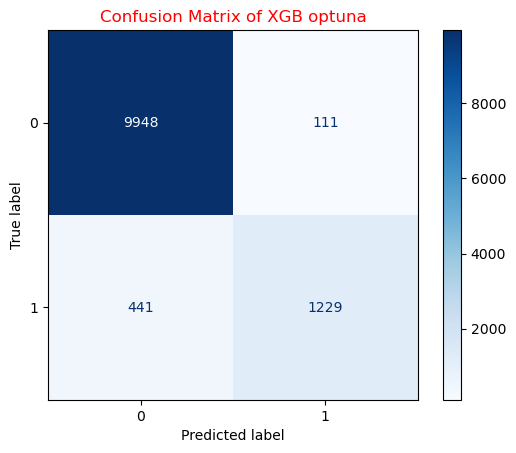

In [25]:
# See the matrix 
see_confusion_matrix(xgb_op, X=X_val, y=y_val)
plt.title('Confusion Matrix of XGB optuna', color='red')

## <span Style='Color:red'> 3. Random Forest regressor with Optuna

In [26]:
# Define the objective function
def objective(trial):
    params ={'n_estimators':trial.suggest_int('n_estimators', 50, 200),
             'max_depth':trial.suggest_int('max_depth', 10, 50),
             'min_samples_split':trial.suggest_int('min_samples_split', 2, 20),
             'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1,20),
             }
    
    rfr= ensemble.RandomForestClassifier(**params)
    score= model_selection.cross_val_score(rfr, X_train, y_train, n_jobs=-1, scoring='f1', cv=3)
    mean_score= score.mean()
    return mean_score

In [27]:
# Define the study function
#study_rfc= optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
#study_rfc.optimize(objective, n_trials=20)

In [28]:
# Save the study
#with open('study_rfc.pickle', 'wb') as to_write:
#    pickle.dump(study_rfc, to_write)

In [29]:
# Load the study
with open('study_rfc.pickle', 'rb') as to_read:
    study_rfc= pickle.load(to_read)

In [30]:
# See the distribution 
optuna.visualization.plot_optimization_history(study_rfc)

In [31]:
# See the importance of different hyperparameter
optuna.visualization.plot_param_importances(study_rfc)

In [32]:
# See the impact of each hyperparameter
optuna.visualization.plot_slice(study_rfc, params=['n_estimators', 'min_samples_leaf', 'min_samples_split', 'max_depth'])

In [33]:
# Get the model with the best parameters
best_params= study_rfc.best_params
rfc_op= ensemble.RandomForestClassifier(**best_params)
rfc_op= rfc_op.fit(X_train, y_train)

In [34]:
# Get the validation accuracy out
rf_results= get_accuracy(model_name='Random Forest', model=rfc_op, X=X_val, y=y_val)
Results_table= pd.concat([Results_table, rf_results]).reset_index(drop=True)

In [35]:
Results_table

,Model,F1 Score,Precision,Recall,Accuracy,ROC AUC
0,XGBoost,0.817,0.917,0.736,0.953,0.955
1,Random Forest,0.804,0.931,0.708,0.951,0.937


Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier')

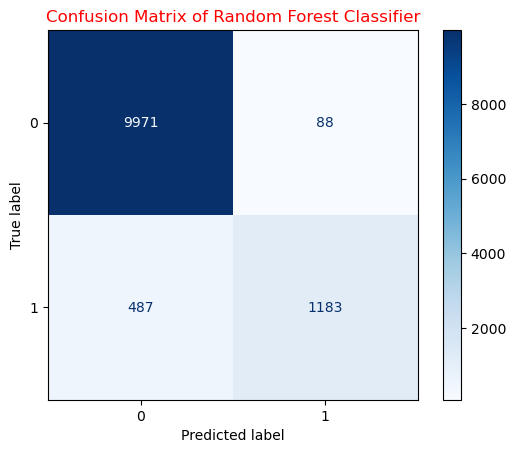

In [36]:
# See the confusion Matrix
see_confusion_matrix(model=rfc_op, X=X_val, y= y_val)
plt.title('Confusion Matrix of Random Forest Classifier', color='red')

## <span Style='Color:red'> 3. LightGBM model with Optuna

In [37]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# Define the objective function for LightGBM
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),  # Same in LightGBM
        'max_depth': trial.suggest_int('max_depth', 20, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Same name in LightGBM
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),  # Same
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Same in LightGBM
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 50)  # Equivalent to XGBoost's min_child_weight
    }

    # Create a LightGBM model with the suggested hyperparameters
    model = lgb.LGBMClassifier(**param)

    # Perform cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Calculate and return the mean F1 score
    mean_score = score.mean()
    
    return mean_score


In [38]:
# Define the study function
#study_light= optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
#study_light.optimize(objective, n_trials= 200)

In [39]:
# Save the study
#with open('study_light.pickle', 'wb') as to_write:
#    pickle.dump(study_light, to_write)

In [40]:
# Load the study
with open('study_light.pickle', 'rb') as to_read:
    study_light= pickle.load(to_read)


In [41]:
# See the distribution of fitted values
optuna.visualization.plot_optimization_history(study_light)

In [42]:
# See the impact of of hyperparmeter
optuna.visualization.plot_param_importances(study_light)

In [43]:
# See the impact of each parameter through trials
optuna.visualization.plot_slice(study_light)

In [44]:
# Set up the model with the best parameters
best_params = study_light.best_params
light_op = lgb.LGBMClassifier(**best_params)
light_op= light_op.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644


In [45]:
# See the accuracy
results_light=get_accuracy('LightGBM', light_op, X_val, y_val)

In [46]:
Results_table= pd.concat([Results_table, results_light]).reset_index(drop=True)

In [47]:
Results_table

,Model,F1 Score,Precision,Recall,Accuracy,ROC AUC
0,XGBoost,0.817,0.917,0.736,0.953,0.955
1,Random Forest,0.804,0.931,0.708,0.951,0.937
2,LightGBM,0.809,0.915,0.725,0.951,0.960


## <span Style='Color:red'> 4. CATboost with Optuna

In [48]:
import catboost as cb
from sklearn.model_selection import cross_val_score

# Define the objective function for CatBoost
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),  # Number of trees
        'depth': trial.suggest_int('depth', 4, 16),  # Depth of trees (instead of max_depth)
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),  # Same as LightGBM
        'rsm': trial.suggest_float('rsm', 0.5, 1.0),  # Random subspace method, similar to colsample_bytree
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1.0),  # Similar to subsample
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),  # L2 regularization term
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),  # Equivalent to min_child_samples in LightGBM
        'random_strength': trial.suggest_float('random_strength', 0.1, 10.0)  # Controls randomness for splits
    }

    # Create a CatBoostClassifier model with the suggested hyperparameters
    model = cb.CatBoostClassifier(**param, 
                                  verbose=0,  # Suppress output during training
                                  loss_function='Logloss',  # Standard loss for classification
                                  eval_metric='F1')  # F1 score as evaluation metric

    # Perform cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Calculate and return the mean F1 score
    mean_score = score.mean()
    
    return mean_score


In [49]:
# Create the study function
#study_cat= optuna.create_study(direction='maximize', sampler= optuna.samplers.TPESampler())
#study_cat.optimize(objective, n_trials=50)

In [50]:
# Save the catboost model
#with open('study_cat.pickle', 'wb') as to_write:
    #pickle.dump(study_cat, to_write)

In [51]:
# Load the catboost model
with open('study_cat.pickle', 'rb') as to_read:
    study_cat= pickle.load(to_read)

In [52]:
# See the distribution of trials
optuna.visualization.plot_optimization_history(study_cat)

In [53]:
# See the importance of hyperparameters
optuna.visualization.plot_param_importances(study_cat)

In [54]:
# See the impact of each hyperparameter
optuna.visualization.plot_slice(study_cat, params= ['n_estimators', 'depth','learning_rate','rsm', 'bagging_temperature', 'l2_leaf_reg','min_data_in_leaf','random_strength'])

In [55]:
# Make the Catboost model with the best params
best_params= study_cat.best_params
cat_op= cb.CatBoostClassifier(**best_params)
cat_op= cat_op.fit(X_train, y_train)

0:	learn: 0.5497174	total: 155ms	remaining: 30.7s
1:	learn: 0.4612297	total: 166ms	remaining: 16.3s
2:	learn: 0.3919521	total: 176ms	remaining: 11.5s
3:	learn: 0.3374029	total: 187ms	remaining: 9.13s
4:	learn: 0.2975087	total: 199ms	remaining: 7.71s
5:	learn: 0.2755600	total: 208ms	remaining: 6.68s
6:	learn: 0.2554252	total: 219ms	remaining: 6.01s
7:	learn: 0.2423210	total: 230ms	remaining: 5.48s
8:	learn: 0.2319304	total: 239ms	remaining: 5.05s
9:	learn: 0.2228536	total: 249ms	remaining: 4.71s
10:	learn: 0.2168582	total: 258ms	remaining: 4.4s
11:	learn: 0.2127355	total: 268ms	remaining: 4.18s
12:	learn: 0.2080874	total: 278ms	remaining: 3.97s
13:	learn: 0.2034708	total: 287ms	remaining: 3.8s
14:	learn: 0.2013436	total: 297ms	remaining: 3.65s
15:	learn: 0.1983270	total: 306ms	remaining: 3.5s
16:	learn: 0.1947799	total: 316ms	remaining: 3.38s
17:	learn: 0.1930912	total: 325ms	remaining: 3.27s
18:	learn: 0.1905494	total: 335ms	remaining: 3.17s
19:	learn: 0.1892449	total: 344ms	remaining:

In [56]:
# See the accuracy of the catboost model
cat_results = get_accuracy('Catboost', cat_op, X_val, y_val)

In [57]:
# Append to the results dataframe
Results_table= pd.concat([Results_table, cat_results]).reset_index(drop=True)
Results_table

,Model,F1 Score,Precision,Recall,Accuracy,ROC AUC
0,XGBoost,0.817,0.917,0.736,0.953,0.955
1,Random Forest,0.804,0.931,0.708,0.951,0.937
2,LightGBM,0.809,0.915,0.725,0.951,0.960
3,Catboost,0.811,0.922,0.724,0.952,0.947


> Conclusion:
- It seems that out of the 4 models, the model that performed the best is the XGBoost model, which had an **F1 Score** of 0.817.

## <span Style='Color:red'> 5. Predicting Loan Status

In [80]:
# Prepare the test data to put in the model
test_data= df_test.copy()
test_data= df_test.drop('id', axis=1).reset_index(drop=True)

# Encode the Variables 
encoder_intent= preprocessing.OneHotEncoder()
encoded_intent= encoder_intent.fit_transform(np.asanyarray(test_data['loan_intent']).reshape(-1,1)).toarray()
model_intent_df= pd.DataFrame(encoded_intent, columns= encoder_intent.get_feature_names_out(['loan_intent']))
test_data= pd.concat([test_data, model_intent_df],axis=1)


encoder_grade= preprocessing.OneHotEncoder()
encoded_grade= encoder_grade.fit_transform(np.asanyarray(test_data['loan_grade']).reshape(-1,1)).toarray()
model_grade_df= pd.DataFrame(encoded_grade, columns= encoder_grade.get_feature_names_out(['loan_grade']))
test_data= pd.concat([test_data, model_grade_df],axis=1)

encoder_ownership= preprocessing.OneHotEncoder()
encoded_ownership= encoder_ownership.fit_transform(np.asanyarray(test_data['person_home_ownership']).reshape(-1,1)).toarray()
model_owner_df= pd.DataFrame(encoded_ownership, columns= encoder_ownership.get_feature_names_out(['person_home_ownership']))
test_data= pd.concat([test_data, model_owner_df],axis=1)

encoder_default= preprocessing.OneHotEncoder()
encoded_default= encoder_default.fit_transform(np.asanyarray(test_data['cb_person_default_on_file']).reshape(-1,1)).toarray()
model_default_df= pd.DataFrame(encoded_default, columns= encoder_default.get_feature_names_out(['cb_person_default_on_file']))
test_data= pd.concat([test_data, model_default_df], axis=1)

# Drop the reduntdant columns
test_data.drop(['loan_intent','loan_grade','person_home_ownership', 'cb_person_default_on_file'], axis=1, inplace= True)

In [81]:
# Split the target variable
X= test_data.copy()

In [79]:
best_params= study_xgb_auc.best_params
xgb_test= xgboost.XGBClassifier(**best_params)
xgb_test.fit(X, y)

c:\Users\LENOVO\anaconda3\envs\apex\Lib\site-packages\xgboost\core.py:158: UserWarning:

[21:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "subsamples" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4291791364640274, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07627069890443997,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=17, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=183, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,23,69000,3.0,25000,15.76,0.36,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,26,96000,6.0,10000,12.68,0.10,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26,30000,5.0,4000,17.19,0.13,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,50000,4.0,7000,8.90,0.14,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,26,102000,8.0,15000,16.32,0.15,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2.0,3000,10.37,0.10,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39094,22,48000,6.0,7000,6.03,0.15,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39095,51,60000,0.0,15000,7.51,0.25,25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39096,22,36000,4.0,14000,15.62,0.39,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [83]:
predictions= pd.DataFrame(xgb_test.predict(X)).rename(columns={0:'predicted_loan_status'})

In [84]:
# Append the predicted variable to the original data
df_predicted= pd.concat([df_test, predictions], axis=1)

In [85]:
df_predicted= df_predicted.iloc[:, [0,-1]]

In [86]:
predicted_df= df_predicted.rename(columns={'predicted_loan_status':'loan_status'})
predicted_df.index= predicted_df['id']
predicted_df.drop('id', axis=1, inplace=True)

In [87]:
predicted_df.to_csv('Predicted_df.csv')

In [73]:
# Define the objective function
def objective(trial):
    params= {'n_estimators':trial.suggest_int('n_estimators', 50, 200),
             'colsample_bytree':trial.suggest_float('colsample_bytree', 0.2,1),
             'min_child_weight':trial.suggest_int('min_child_weight', 1, 50),
             'subsample':trial.suggest_float('subsamples', 0.2, 1),
             'max_depth':trial.suggest_int('max_depth', 20, 100),
             'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.3, log=True)}
    model= xgboost.XGBClassifier(**params)
    scoring= model_selection.cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    mean_score= scoring.mean()
    return mean_score

In [74]:
# Define the study function
study_xgb_auc= optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study_xgb_auc.optimize(objective, n_trials=200)

[I 2024-10-16 21:00:38,057] A new study created in memory with name: no-name-183b8b81-6f44-4b5c-ba9d-9cc582a597da
[I 2024-10-16 21:00:38,797] Trial 0 finished with value: 0.924324574828869 and parameters: {'n_estimators': 61, 'colsample_bytree': 0.36044938962415796, 'min_child_weight': 30, 'subsamples': 0.23710645874186487, 'max_depth': 30, 'learning_rate': 0.02762763271583517}. Best is trial 0 with value: 0.924324574828869.
[I 2024-10-16 21:00:40,013] Trial 1 finished with value: 0.9469520428275571 and parameters: {'n_estimators': 62, 'colsample_bytree': 0.3735982483687781, 'min_child_weight': 14, 'subsamples': 0.9270278220661192, 'max_depth': 65, 'learning_rate': 0.055563822687649284}. Best is trial 1 with value: 0.9469520428275571.
[I 2024-10-16 21:00:41,940] Trial 2 finished with value: 0.940355531108972 and parameters: {'n_estimators': 196, 'colsample_bytree': 0.8856578501582706, 'min_child_weight': 32, 'subsamples': 0.31872235662860043, 'max_depth': 81, 'learning_rate': 0.0297368

In [ ]:
def objective(trial):
    param= {'n_estimators':trial.suggest_int('n_estimators', 50 ,200),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 50),
            'max_depth': trial.suggest_int('max_depth', 20, 100),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'subsample':trial.suggest_float('subsample', 0.5, 1)}
    model= xgboost.XGBClassifier(**param)
    score= model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_score= score.mean()
    return mean_score